In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Visualization
import plotly.express as px

# Setting visual style
sns.set(style="whitegrid")

In [4]:
df.isnull().sum()

Year                   0
Month_name             0
Day                    0
Date                   0
State                  0
Vehicle Class          0
Vehicle Category       0
Vehicle Type           0
CNG ONLY               0
DIESEL                 0
DIESEL/HYBRID          0
DI-METHYL ETHER        0
DUAL DIESEL/BIO CNG    0
DUAL DIESEL/CNG        0
DUAL DIESEL/LNG        0
ELECTRIC(BOV)          0
ETHANOL                0
FUEL CELL HYDROGEN     0
LNG                    0
LPG ONLY               0
METHANOL               0
NOT APPLICABLE         0
PETROL                 0
PETROL/CNG             0
PETROL/ETHANOL         0
PETROL/HYBRID          0
PETROL/LPG             0
PETROL/METHANOL        0
SOLAR                  0
Total                  0
dtype: int64

In [5]:
df.describe()

,Year,Day,CNG ONLY,DIESEL,DIESEL/HYBRID,DI-METHYL ETHER,DUAL DIESEL/BIO CNG,DUAL DIESEL/CNG,DUAL DIESEL/LNG,ELECTRIC(BOV),...,METHANOL,NOT APPLICABLE,PETROL,PETROL/CNG,PETROL/ETHANOL,PETROL/HYBRID,PETROL/LPG,PETROL/METHANOL,SOLAR,Total
count,96845.000000,96845.0,96845.000000,96845.000000,96845.000000,96845.0,96845.0,96845.000000,96845.000000,96845.000000,...,96845.000000,96845.000000,96845.000000,96845.000000,96845.000000,96845.000000,96845.000000,96845.0,96845.000000,96845.000000
mean,2018.622768,1.0,11.650823,272.809283,1.616955,0.0,0.0,0.000475,0.000010,37.108896,...,0.000062,9.768145,1862.810264,35.887408,4.500026,8.675915,6.410956,0.0,0.008601,2252.158790
std,2.895581,0.0,138.673960,1053.241395,29.404324,0.0,0.0,0.027639,0.003213,431.566675,...,0.007871,85.675666,12486.188889,354.948849,147.143291,104.598617,83.484813,0.0,0.242815,12751.813145
min,2014.000000,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
25%,2016.000000,1.0,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.000000
50%,2019.000000,1.0,0.000000,5.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,24.000000
75%,2021.000000,1.0,0.000000,59.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,246.000000
max,2024.000000,1.0,6852.000000,25015.000000,2004.000000,0.0,0.0,3.000000,1.000000,20584.000000,...,1.000000,4307.000000,370384.000000,15000.000000,17266.000000,4276.000000,4047.000000,0.0,26.000000,378779.000000


In [6]:
df.columns

Index(['Year', 'Month_name', 'Day', 'Date', 'State', 'Vehicle Class',
       'Vehicle Category', 'Vehicle Type', 'CNG ONLY', 'DIESEL',
       'DIESEL/HYBRID', 'DI-METHYL ETHER', 'DUAL DIESEL/BIO CNG',
       'DUAL DIESEL/CNG', 'DUAL DIESEL/LNG', 'ELECTRIC(BOV)', 'ETHANOL',
       'FUEL CELL HYDROGEN', 'LNG', 'LPG ONLY', 'METHANOL', 'NOT APPLICABLE',
       'PETROL', 'PETROL/CNG', 'PETROL/ETHANOL', 'PETROL/HYBRID', 'PETROL/LPG',
       'PETROL/METHANOL', 'SOLAR', 'Total'],
      dtype='object')

In [11]:
df['Total'] = df['Total'].fillna(df['Total'].median())

In [12]:
df.dropna(subset=['Vehicle Class', 'Vehicle Category', 'Vehicle Type'], inplace=True)

In [15]:
df.drop_duplicates(inplace=True)

In [17]:

df['YoY_Growth'] = df.groupby('State')['Total'].pct_change().fillna(0)

# Market Share per State
df['Market_Share'] = df['Total'] / df.groupby('State')['Total'].transform('sum')


In [32]:

le = LabelEncoder()
df['EV_Type_Encoded'] = le.fit_transform(df['Vehicle Class'])


In [33]:
scaler = StandardScaler()
df[['Sales_Volume_Scaled', 'YoY_Growth', 'Market_Share']] = scaler.fit_transform(df[['Total', 'YoY_Growth', 'Market_Share']])


In [39]:
X = df[['Sales_Volume_Scaled', 'YoY_Growth', 'Market_Share', 'EV_Type_Encoded']]


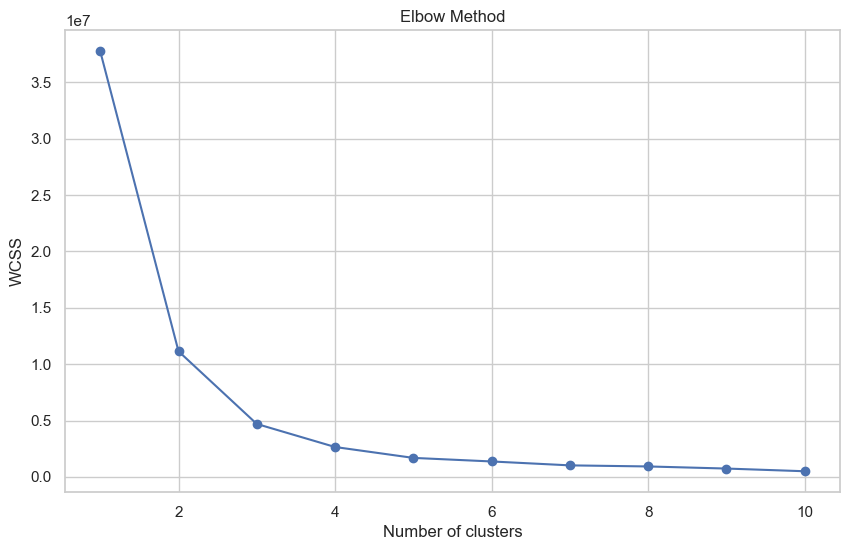

In [35]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [47]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


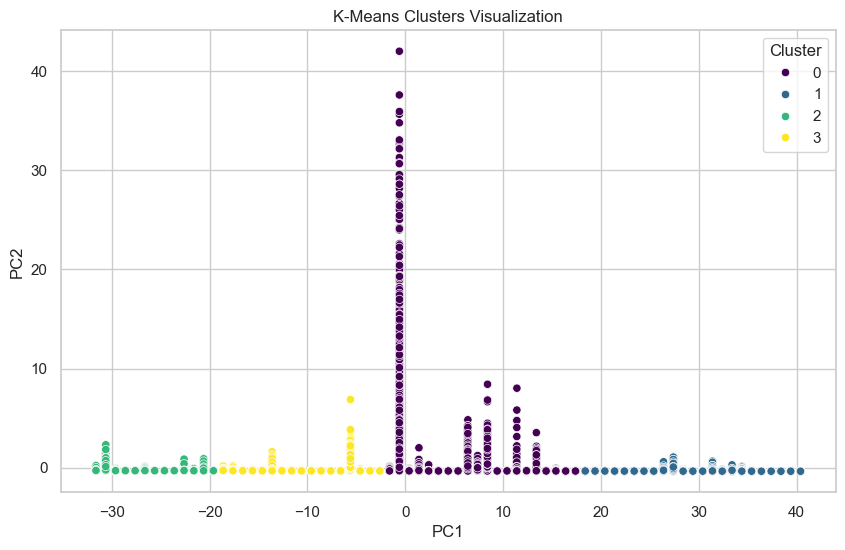

In [48]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('K-Means Clusters Visualization')
plt.show()


In [49]:
for cluster in sorted(df['Cluster'].unique()):
    print(f"\nCluster {cluster} Profile:")
    cluster_data = df[df['Cluster'] == cluster]
    print(f"Number of States: {cluster_data['State'].nunique()}")
    print(f"Average Sales Volume: {cluster_data['Total'].mean():.2f}")
    print(f"Average YoY Growth: {cluster_data['YoY_Growth'].mean():.2f}")
    print(f"Average Market Share: {cluster_data['Market_Share'].mean():.2f}")
    print(f"Predominant EV Type: {cluster_data['Vehicle Class'].mode()[0]}")



Cluster 0 Profile:
Number of States: 34
Average Sales Volume: 6485.04
Average YoY Growth: 0.10
Average Market Share: 0.53
Predominant EV Type: MOTOR CAR

Cluster 1 Profile:
Number of States: 33
Average Sales Volume: 312.20
Average YoY Growth: -0.06
Average Market Share: -0.25
Predominant EV Type: THREE WHEELER (PASSENGER)

Cluster 2 Profile:
Number of States: 34
Average Sales Volume: 376.49
Average YoY Growth: -0.05
Average Market Share: -0.26
Predominant EV Type: BUS

Cluster 3 Profile:
Number of States: 34
Average Sales Volume: 326.14
Average YoY Growth: -0.04
Average Market Share: -0.22
Predominant EV Type: GOODS CARRIER


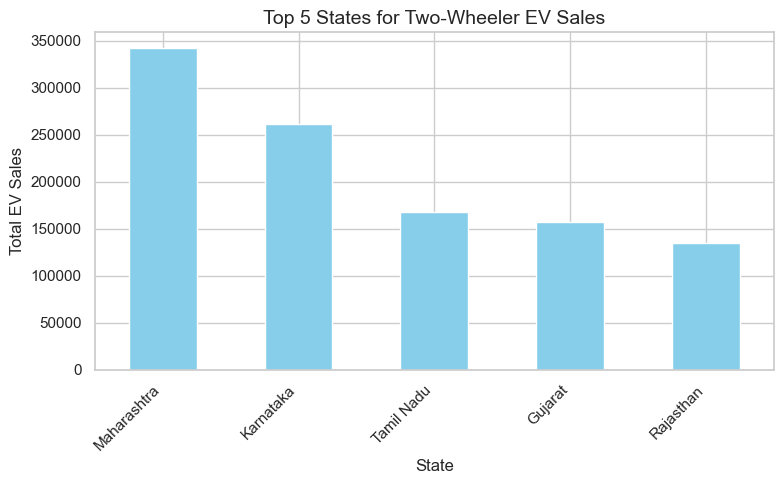

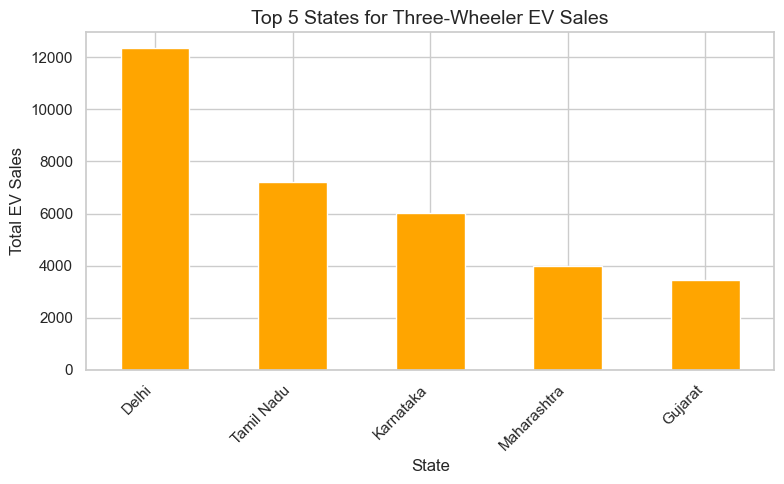

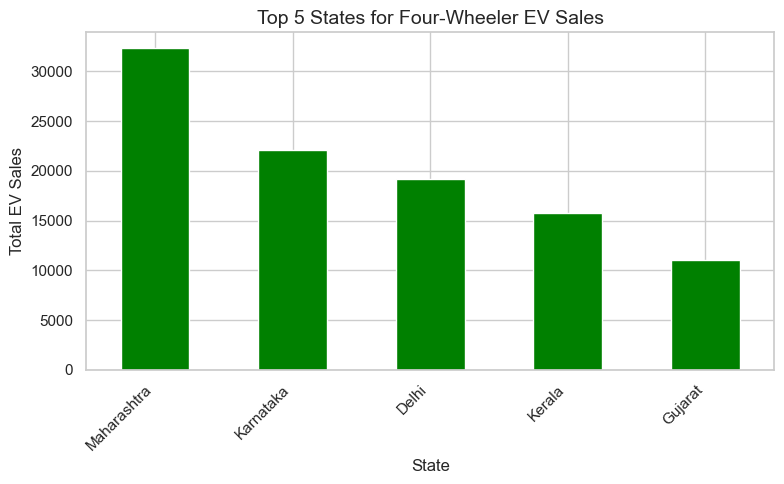

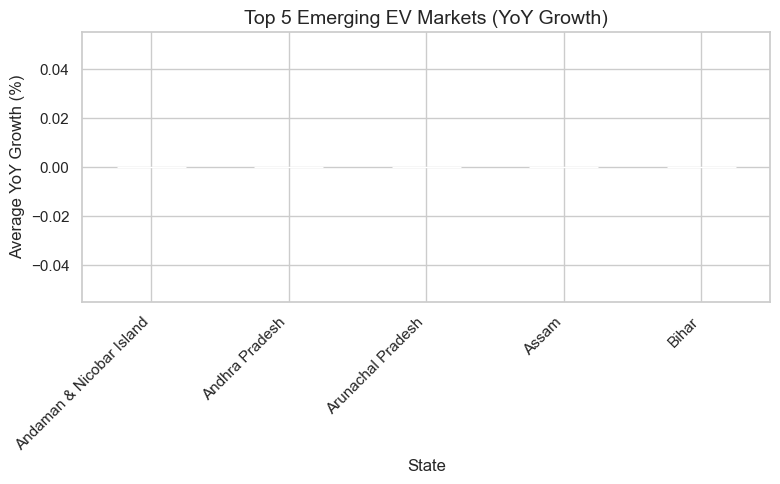

In [87]:
import pandas as pd
import matplotlib.pyplot as plt


df['ELECTRIC(BOV)'] = pd.to_numeric(df['ELECTRIC(BOV)'], errors='coerce')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
two_wheeler_classes = ['MOPED', 'M-CYCLE/SCOOTER', 'M-CYCLE/SCOOTER(M)']
df['Vehicle Class'] = df['Vehicle Class'].replace(two_wheeler_classes, 'Two-Wheeler')
two_wheeler_df = df[df['Vehicle Class'] == 'Two-Wheeler']
top_two_wheeler_states = two_wheeler_df.groupby('State')['ELECTRIC(BOV)'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 5))
top_two_wheeler_states.plot(kind='bar', color='skyblue')
plt.title('Top 5 States for Two-Wheeler EV Sales', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total EV Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Top States for 3-Wheelers

three_wheeler_classes = ['THREE WHEELER (GOODS)', 'THREE WHEELER (PERSONAL)']
df['Vehicle Class'] = df['Vehicle Class'].replace(three_wheeler_classes, 'Three-Wheeler')

three_wheeler_df = df[df['Vehicle Class'] == 'Three-Wheeler']
top_three_wheeler_states = three_wheeler_df.groupby('State')['ELECTRIC(BOV)'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 5))
top_three_wheeler_states.plot(kind='bar', color='orange')
plt.title('Top 5 States for Three-Wheeler EV Sales', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total EV Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Top States for 4-Wheelers


four_wheeler_classes = ['MOTOR CAR', 'MOTOR CAB']
df['Vehicle Class'] = df['Vehicle Class'].replace(four_wheeler_classes, 'Four-Wheeler')

four_wheeler_df = df[df['Vehicle Class'] == 'Four-Wheeler']
top_four_wheeler_states = four_wheeler_df.groupby('State')['ELECTRIC(BOV)'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 5))
top_four_wheeler_states.plot(kind='bar', color='green')
plt.title('Top 5 States for Four-Wheeler EV Sales', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total EV Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Emerging Markets based on Year-over-Year (YoY) Growth
grouped_df = df.groupby(['Year', 'State'])['ELECTRIC(BOV)'].sum().unstack()

# Calculate YoY growth
yoy_growth = grouped_df.pct_change() * 100

# Drop rows with NaN values (for first year)
yoy_growth = yoy_growth.dropna()

# Find states with the highest YoY growth over all years
top_emerging_markets = yoy_growth.mean().sort_values(ascending=False).head(5)

# Plot Emerging Markets
plt.figure(figsize=(8, 5))
top_emerging_markets.plot(kind='bar', color='purple')
plt.title('Top 5 Emerging EV Markets (YoY Growth)', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Average YoY Growth (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


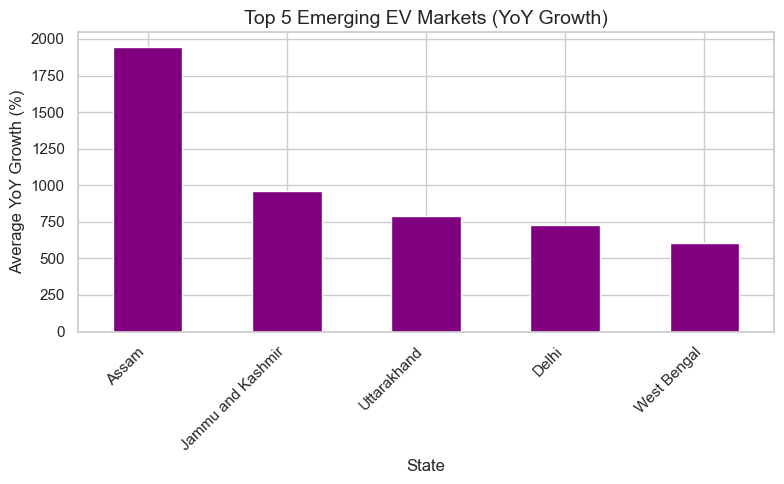

Top Emerging Markets:
State
Assam                1947.907524
Jammu and Kashmir     962.054400
Uttarakhand           790.671858
Delhi                 725.117443
West Bengal           603.918120
dtype: float64


In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df contains 'Year', 'State', 'ELECTRIC(BOV)' for EV sales
df['ELECTRIC(BOV)'] = pd.to_numeric(df['ELECTRIC(BOV)'], errors='coerce')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Fill any missing values in the EV sales data with 0 (if no sales in that year)
df['ELECTRIC(BOV)'] = df['ELECTRIC(BOV)'].fillna(0)

# Group by Year and State and sum EV sales per state per year
grouped_df = df.groupby(['Year', 'State'])['ELECTRIC(BOV)'].sum().unstack()

# Fill any missing values (years with no data for certain states) with 0
grouped_df = grouped_df.fillna(0)


yoy_growth = grouped_df.pct_change() * 100
yoy_growth = yoy_growth.replace([float('inf'), -float('inf')], 0).fillna(0)
top_emerging_markets = yoy_growth.mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 5))
top_emerging_markets.plot(kind='bar', color='purple')
plt.title('Top 5 Emerging EV Markets (YoY Growth)', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Average YoY Growth (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Top Emerging Markets:")
print(top_emerging_markets)


In [90]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df contains 'Year', 'State', 'Vehicle_Class', and 'ELECTRIC(BOV)'
df['ELECTRIC(BOV)'] = pd.to_numeric(df['ELECTRIC(BOV)'], errors='coerce')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# 1. Preprocessing

# Total EV sales by state
total_sales_by_state = df.groupby('State')['ELECTRIC(BOV)'].sum()

# Calculate YoY growth per state
grouped_df = df.groupby(['Year', 'State'])['ELECTRIC(BOV)'].sum().unstack().fillna(0)
yoy_growth = grouped_df.pct_change().replace([float('inf'), -float('inf')], 0).fillna(0)
avg_yoy_growth = yoy_growth.mean()

# Calculate market share per state (state's total sales / total national sales)
total_sales = total_sales_by_state.sum()
market_share_by_state = total_sales_by_state / total_sales

# Find the predominant EV type per state
predominant_ev_type = df.groupby(['State', 'Vehicle Class'])['ELECTRIC(BOV)'].sum().unstack().idxmax(axis=1)

# 2. Create a DataFrame with the key metrics
data = pd.DataFrame({
    'Total Sales': total_sales_by_state,
    'Avg YoY Growth': avg_yoy_growth,
    'Market Share': market_share_by_state
})

# Normalize the data for clustering
data_normalized = (data - data.mean()) / data.std()

# 3. Apply K-Means Clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_normalized)

# 4. Cluster Profiling
cluster_profiles = []

for cluster_num in range(4):
    cluster_data = data[data['Cluster'] == cluster_num]
    
    # Cluster size
    num_states = cluster_data.shape[0]
    
    # Average sales, growth, and market share
    avg_sales = cluster_data['Total Sales'].mean()
    avg_yoy = cluster_data['Avg YoY Growth'].mean()
    avg_market_share = cluster_data['Market Share'].mean()
    
    # Predominant EV type in the cluster
    states_in_cluster = cluster_data.index
    predominant_type_in_cluster = predominant_ev_type[states_in_cluster].value_counts().idxmax()
    
    # Store the profile for this cluster
    cluster_profiles.append({
        'Cluster': cluster_num,
        'Number of States': num_states,
        'Average Sales Volume': avg_sales,
        'Average YoY Growth': avg_yoy,
        'Average Market Share': avg_market_share,
        'Predominant EV Type': predominant_type_in_cluster
    })

# 5. Display Cluster Profiles
for profile in cluster_profiles:
    print(f"Cluster {profile['Cluster']} Profile:")
    print(f"Number of States: {profile['Number of States']}")
    print(f"Average Sales Volume: {profile['Average Sales Volume']:.2f}")
    print(f"Average YoY Growth: {profile['Average YoY Growth']:.2f}")
    print(f"Average Market Share: {profile['Average Market Share']:.2f}")
    print(f"Predominant EV Type: {profile['Predominant EV Type']}")
    print("\n")


Cluster 0 Profile:
Number of States: 23
Average Sales Volume: 27485.57
Average YoY Growth: 2.49
Average Market Share: 0.01
Predominant EV Type: Two-Wheeler


Cluster 1 Profile:
Number of States: 9
Average Sales Volume: 230850.22
Average YoY Growth: 2.12
Average Market Share: 0.06
Predominant EV Type: Two-Wheeler


Cluster 2 Profile:
Number of States: 1
Average Sales Volume: 151917.00
Average YoY Growth: 19.48
Average Market Share: 0.04
Predominant EV Type: E-RICKSHAW(P)


Cluster 3 Profile:
Number of States: 1
Average Sales Volume: 732074.00
Average YoY Growth: 2.21
Average Market Share: 0.20
Predominant EV Type: E-RICKSHAW(P)




In [92]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df contains 'Year', 'State', 'Vehicle_Class', and 'ELECTRIC(BOV)'
df['ELECTRIC(BOV)'] = pd.to_numeric(df['ELECTRIC(BOV)'], errors='coerce')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# 1. Preprocessing

# Total EV sales by state
total_sales_by_state = df.groupby('State')['ELECTRIC(BOV)'].sum()

# Calculate YoY growth per state
grouped_df = df.groupby(['Year', 'State'])['ELECTRIC(BOV)'].sum().unstack().fillna(0)
yoy_growth = grouped_df.pct_change().replace([float('inf'), -float('inf')], 0).fillna(0)
avg_yoy_growth = yoy_growth.mean()

# Calculate market share per state (state's total sales / total national sales)
total_sales = total_sales_by_state.sum()
market_share_by_state = total_sales_by_state / total_sales

# Find the predominant EV type per state
predominant_ev_type = df.groupby(['State', 'Vehicle Class'])['ELECTRIC(BOV)'].sum().unstack().idxmax(axis=1)

# 2. Create a DataFrame with the key metrics
data = pd.DataFrame({
    'Total Sales': total_sales_by_state,
    'Avg YoY Growth': avg_yoy_growth,
    'Market Share': market_share_by_state
})

# Normalize the data for clustering
data_normalized = (data - data.mean()) / data.std()

# 3. Apply K-Means Clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_normalized)

# 4. Cluster Profiling
cluster_profiles = []

for cluster_num in range(4):
    cluster_data = data[data['Cluster'] == cluster_num]
    
    # Cluster size
    num_states = cluster_data.shape[0]
    
    # Average sales, growth, and market share
    avg_sales = cluster_data['Total Sales'].mean()
    avg_yoy = cluster_data['Avg YoY Growth'].mean()
    avg_market_share = cluster_data['Market Share'].mean()
    
    # States in the cluster
    states_in_cluster = cluster_data.index.tolist()
    
    # Predominant EV type in the cluster
    predominant_type_in_cluster = predominant_ev_type[states_in_cluster].value_counts().idxmax()
    
    # Store the profile for this cluster
    cluster_profiles.append({
        'Cluster': cluster_num,
        'Number of States': num_states,
        'States': states_in_cluster,  # List of states in this cluster
        'Average Sales Volume': avg_sales,
        'Average YoY Growth': avg_yoy,
        'Average Market Share': avg_market_share,
        'Predominant EV Type': predominant_type_in_cluster
    })

# 5. Display Cluster Profiles
for profile in cluster_profiles:
    print(f"Cluster {profile['Cluster']} Profile:")
    print(f"Number of States: {profile['Number of States']}")
    print(f"States: {profile['States']}")
    print(f"Average Sales Volume: {profile['Average Sales Volume']:.2f}")
    print(f"Average YoY Growth: {profile['Average YoY Growth']:.2f}")
    print(f"Average Market Share: {profile['Average Market Share']:.2f}")
    print(f"Predominant EV Type: {profile['Predominant EV Type']}")
    print("\n")


Cluster 0 Profile:
Number of States: 23
States: ['Andaman & Nicobar Island', 'Andhra Pradesh', 'Arunachal Pradesh', 'Chandigarh', 'Chhattisgarh', 'DNH and DD', 'Goa', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Ladakh', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Sikkim', 'Tripura', 'Uttarakhand', 'West Bengal']
Average Sales Volume: 27485.57
Average YoY Growth: 2.49
Average Market Share: 0.01
Predominant EV Type: Two-Wheeler


Cluster 1 Profile:
Number of States: 9
States: ['Bihar', 'Delhi', 'Gujarat', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Rajasthan', 'Tamil Nadu']
Average Sales Volume: 230850.22
Average YoY Growth: 2.12
Average Market Share: 0.06
Predominant EV Type: Two-Wheeler


Cluster 2 Profile:
Number of States: 1
States: ['Assam']
Average Sales Volume: 151917.00
Average YoY Growth: 19.48
Average Market Share: 0.04
Predominant EV Type: E-RICKSHAW(P)


Cluster 3 Profile:
Number of States: 1
States: ['U

In [106]:
print(type(cluster_profiles))


<class 'list'>


In [107]:
import pandas as pd

# Example: if cluster_profiles is a list of dictionaries
cluster_profiles = pd.DataFrame(cluster_profiles)


In [117]:
print(df['Vehicle Category'].value_counts())

Vehicle Category
Others        54423
2-Wheelers    13121
3-Wheelers    11491
Bus            9119
4-Wheelers     8691
Name: count, dtype: int64
